In [6]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imwrite

%matplotlib inline 

# Part a)

In [11]:
def low_rank_approximation(X, rank):
    # YOUR CODE GOES HERE
    U, S, VH = np.linalg.svd(X, full_matrices=False)
    for i in range(rank, len(S)):
        S[i] = 0
    return np.dot(U * S, VH)

In [19]:
face = imread("./data/face.jpg")

ranks = [5, 20, 100]
approxes = []
for rank in ranks:
    approx = low_rank_approximation(face, rank)
    approxes.append(approx)
    imwrite('rank-' + str(rank) + 'approx.jpg', approxes[-1])

Lossy conversion from float64 to uint8. Range [-1.0006768980573728, 215.45006443400595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.5920753327970556, 217.90012828664968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.838667796229856, 223.73626166859208]. Convert image to uint8 prior to saving to suppress this warning.


# Part b)

In [20]:
sky = imread("./data/sky.jpg")

ranks = [5, 20, 100]
approxes = []
for rank in ranks:
    approx = low_rank_approximation(sky, rank)
    approxes.append(approx)
    imwrite('rank-' + str(rank) + 'sky.jpg', approxes[-1])

Lossy conversion from float64 to uint8. Range [84.57691733909182, 231.10834339073426]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [86.67033547985925, 231.695242396234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [85.91888846990022, 231.98040694405833]. Convert image to uint8 prior to saving to suppress this warning.


# Part c)

In [21]:
def mse(img1, img2):
    # YOUR CODE GOES HERE 
    return np.sum((img1 - img2)**2) / (img1.shape[0] * img1.shape[1])

In [26]:
ranks = np.arange(1, 101)
face_errors = []
sky_errors = []

for rank in ranks:
    face_approx = low_rank_approximation(face, rank)
    sky_approx = low_rank_approximation(sky, rank)
    
    face_errors.append(mse(face_approx, face))
    sky_errors.append(mse(sky_approx, sky))

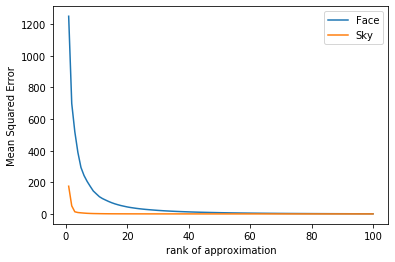

In [27]:
plt.plot(ranks, face_errors, label="Face")
plt.plot(ranks, sky_errors, label="Sky")

plt.xlabel("rank of approximation")
plt.ylabel("Mean Squared Error")
plt.legend()

In [28]:
face_approxes = []
sky_approxes = []

for rank in ranks:
    face_approx = low_rank_approximation(face, rank)
    sky_approx = low_rank_approximation(sky, rank)
    
    face_approxes.append(face_approx)
    sky_approxes.append(sky_approx)

In [29]:
imwrite('rank-40face.jpg', face_approxes[39])
imwrite('rank-50face.jpg', face_approxes[49])
imwrite('rank-60face.jpg', face_approxes[59])

Lossy conversion from float64 to uint8. Range [-1.9635373802820115, 220.60361069329608]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.9336688492942498, 223.4212755586802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-2.4596650726000866, 223.0406602199797]. Convert image to uint8 prior to saving to suppress this warning.


In [35]:
imwrite('rank-10sky.jpg', sky_approxes[9])

Lossy conversion from float64 to uint8. Range [86.549873095283, 231.080218262762]. Convert image to uint8 prior to saving to suppress this warning.
